# Library

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [13]:
#Load datasets
data=pd.read_csv("diabetes.csv")
#data = np.loadtxt('diabetes.csv',delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data preprocessing

In [14]:
#Count total na values in dataframe
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


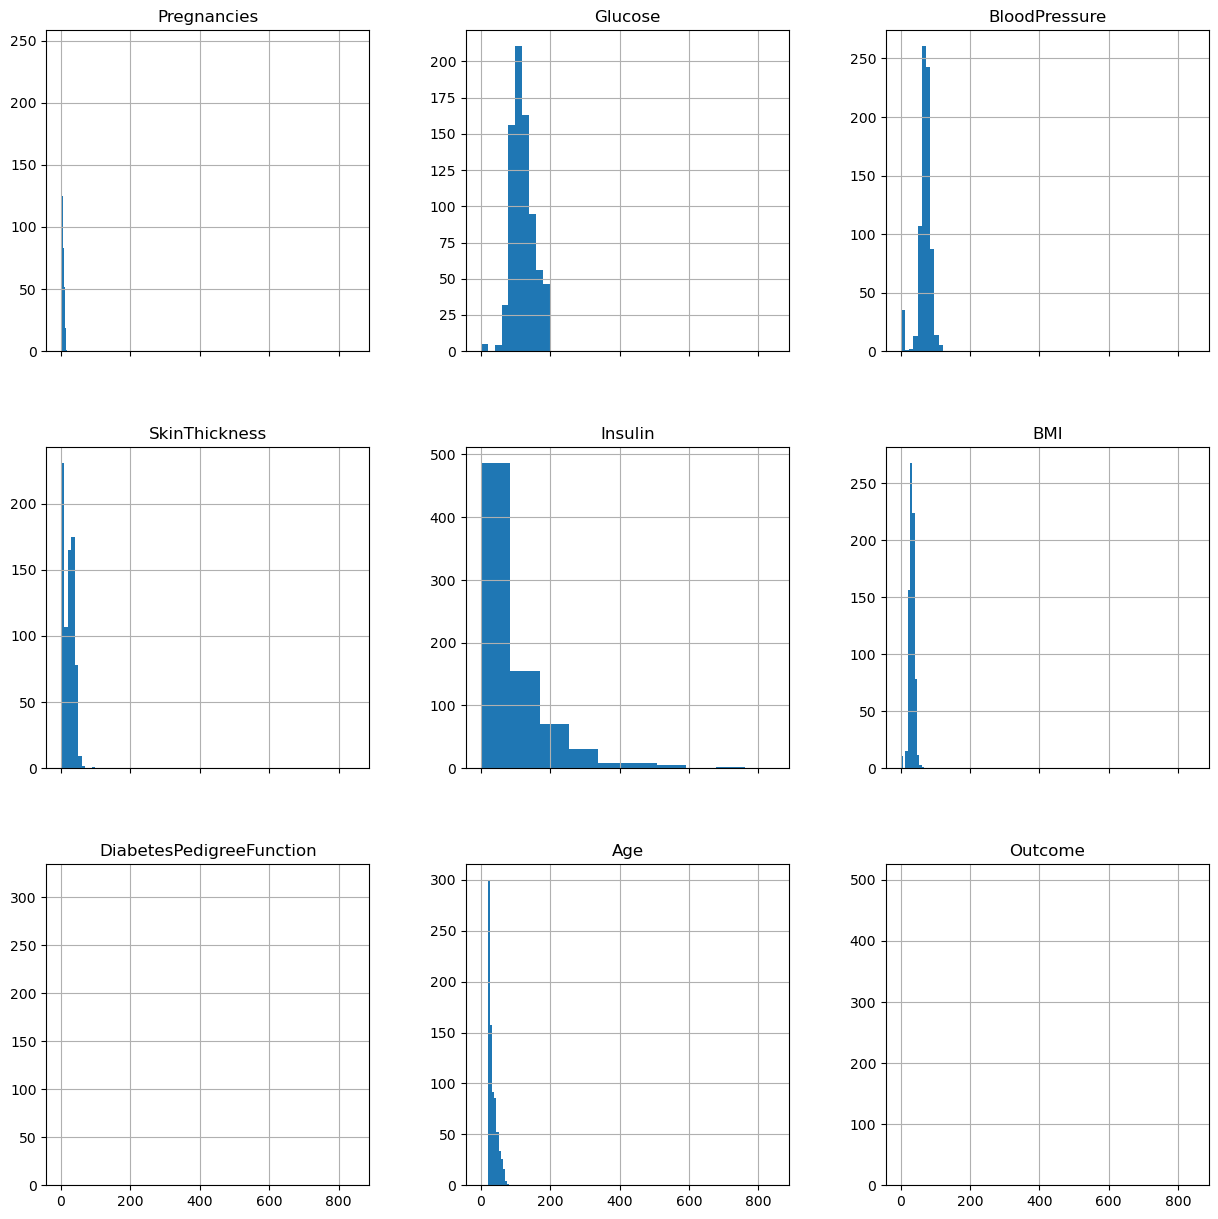

In [15]:
data.hist(bins=10, figsize=(15,15),sharex=True)
plt.show()

# (1) Z-score standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert standardized data to dataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

print(scaled_data_df)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

# Neural Network model 

In [20]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
np.random.seed(442)
x = scaled_data_df.iloc[:, 0:8].values
Y = scaled_data_df.iloc[:, 8].values
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x=x,y=Y,epochs=150,batch_size=10)
scores = model.evaluate(x=x,y=Y)
print('\n%s:%.2f%%' %(model.metrics_names[1],scores[1]*100))

Epoch 1/150
77/77 [==============================] - 0s 895us/step - loss: 5.3518 - accuracy: 0.4388
Epoch 2/150
77/77 [==============================] - 0s 961us/step - loss: 1.0211 - accuracy: 0.5365
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8497 - accuracy: 0.6628
Epoch 4/150
77/77 [==============================] - 0s 934us/step - loss: 0.7868 - accuracy: 0.6810
Epoch 5/150
77/77 [==============================] - 0s 908us/step - loss: 0.7248 - accuracy: 0.6849
Epoch 6/150
77/77 [==============================] - 0s 869us/step - loss: 0.7096 - accuracy: 0.6745
Epoch 7/150
77/77 [==============================] - 0s 882us/step - loss: 0.6705 - accuracy: 0.6875
Epoch 8/150
77/77 [==============================] - 0s 882us/step - loss: 0.6568 - accuracy: 0.6862
Epoch 9/150
77/77 [==============================] - 0s 921us/step - loss: 0.6509 - accuracy: 0.7005
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 

# Cross validation 

In [21]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# prepare the data
np.random.seed(442)
x = data.iloc[:, 0:8].values
Y = data.iloc[:, 8].values

# define the K-fold cross-validation method
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# define the function to create the model
def create_model(neurons=12):
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create the KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
neurons = [8, 12, 16]
batch_size = [10, 20, 40]
epochs = [100, 150, 200]
param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs)

# perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(x, Y)

# print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))


C:\Users\30683\AppData\Local\Temp\ipykernel_79776\692950551.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.748723 using {'batch_size': 10, 'epochs': 150, 'neurons': 8}
0.717477 (0.019094) with: {'batch_size': 10, 'epochs': 100, 'neurons': 8}
0.726500 (0.026366) with: {'batch_size': 10, 'epochs': 100, 'neurons': 12}
0.710916 (0.038160) with: {'batch_size': 10, 'epochs': 100, 'neurons': 16}
0.748723 (0.026357) with: {'batch_size': 10, 'epochs': 150, 'neurons': 8}
0.696656 (0.067777) with: {'batch_size': 10, 'epochs': 150, 'neurons': 12}
0.723962 (0.028125) with: {'batch_size': 10, 'epochs': 150, 'neurons': 16}
0.716094 (0.028585) with: {'batch_size': 10, 'epochs': 200, 'neurons': 8}
0.725329 (0.042948) with: {'batch_size': 10, 'epochs': 200, 'neurons': 12}
0.747398 (0.026398) with: {'batch_size': 10, 'epochs': 200, 'neurons': 16}
0.696630 (0.019264) with: {'batch_size': 20, 'epochs': 100, 'neurons': 8}
0.706994 (0.017618) with: {'batch_size': 20, 'epochs': 100, 'neurons': 12}
0.712316 (0.033620) with: {'batch_size': 20, 'epochs': 100, 'neurons': 16}
0.709651 (0.014867) with: {'batch_s